# Import library

In [1]:
!pip install fiftyone
!pip install pycocotools

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
INFO: pip is looking at multiple versions of motor to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 82.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.9/108.9 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.7/99.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.7/74.7 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.1/943.1 kB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [2]:
import os
import torch
from torchvision.transforms import functional as F
from torchvision import transforms as T
from torch.utils.data import DataLoader, random_split
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from torch.utils.data import Dataset
import json
import fiftyone as fo
import fiftyone.zoo as foz
from pycocotools.coco import COCO
import torchvision

# EDA



### Import dataset val coco 2017 dengan label person

In [3]:
dataset = foz.load_zoo_dataset(
    "coco-2017",
    splits=["validation"],
    classes=["person"],
)

INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [4.9s elapsed, 0s remaining, 420.1Mb/s]       


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [4.9s elapsed, 0s remaining, 420.1Mb/s]       


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 2693 images


 100% |████████████████| 2693/2693 [9.2m elapsed, 0s remaining, 4.9 images/s]       


INFO:eta.core.utils: 100% |████████████████| 2693/2693 [9.2m elapsed, 0s remaining, 4.9 images/s]       


Writing annotations for 2693 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 2693 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████| 2693/2693 [22.2s elapsed, 0s remaining, 159.8 samples/s]      


INFO:eta.core.utils: 100% |███████████████| 2693/2693 [22.2s elapsed, 0s remaining, 159.8 samples/s]      


Dataset 'coco-2017-validation' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation' created


### Melihat Label yang terdapat pada instances_val2017.json

In [4]:
root = "/root/fiftyone/coco-2017/validation/data"
ann_path = "/root/fiftyone/coco-2017/raw/instances_val2017.json"

In [5]:
import sys, getopt
import json

with open(ann_path,'r') as COCO:
            js = json.loads(COCO.read())
            print(json.dumps(js['categories']))

[{"supercategory": "person", "id": 1, "name": "person"}, {"supercategory": "vehicle", "id": 2, "name": "bicycle"}, {"supercategory": "vehicle", "id": 3, "name": "car"}, {"supercategory": "vehicle", "id": 4, "name": "motorcycle"}, {"supercategory": "vehicle", "id": 5, "name": "airplane"}, {"supercategory": "vehicle", "id": 6, "name": "bus"}, {"supercategory": "vehicle", "id": 7, "name": "train"}, {"supercategory": "vehicle", "id": 8, "name": "truck"}, {"supercategory": "vehicle", "id": 9, "name": "boat"}, {"supercategory": "outdoor", "id": 10, "name": "traffic light"}, {"supercategory": "outdoor", "id": 11, "name": "fire hydrant"}, {"supercategory": "outdoor", "id": 13, "name": "stop sign"}, {"supercategory": "outdoor", "id": 14, "name": "parking meter"}, {"supercategory": "outdoor", "id": 15, "name": "bench"}, {"supercategory": "animal", "id": 16, "name": "bird"}, {"supercategory": "animal", "id": 17, "name": "cat"}, {"supercategory": "animal", "id": 18, "name": "dog"}, {"supercategory

### Melihat jumlah label person pada data json

In [6]:
# Filter untuk hanya menyertakan anotasi dengan label "person"
person_view = dataset.filter_labels("ground_truth", fo.ViewField("label") == "person")

# Verifikasi jumlah sampel dengan bounding box "person"
print(f"Number of samples with 'person': {len(person_view)}")


Number of samples with 'person': 2693


## Filter Label Pada Instances_val2017.json dengan label person

In [7]:
!mkdir /content/annotations

In [8]:
import json

# Path ke file instances_val2017.json asli
input_json_path = "/root/fiftyone/coco-2017/raw/instances_val2017.json"
# Path untuk menyimpan file JSON hasil filter
output_json_path = "/content/annotations/annotation_person.json"

# Baca file JSON asli
with open(input_json_path, "r") as f:
    coco_data = json.load(f)

# Filter anotasi dengan label "person" (category_id = 1)
filtered_annotations = [ann for ann in coco_data['annotations'] if ann['category_id'] == 1]

# Ambil ID gambar yang memiliki anotasi "person"
person_image_ids = {ann['image_id'] for ann in filtered_annotations}

# Filter gambar yang memiliki anotasi "person"
filtered_images = [img for img in coco_data['images'] if img['id'] in person_image_ids]

# Buat struktur data baru untuk file JSON hasil filter
filtered_coco_data = {
    "images": filtered_images,
    "annotations": filtered_annotations,
    "categories": [cat for cat in coco_data['categories'] if cat['id'] == 1]  # Hanya kategori "person"
}

# Simpan file JSON hasil filter
with open(output_json_path, "w") as f:
    json.dump(filtered_coco_data, f)

print(f"Filtered JSON saved to: {output_json_path}")


Filtered JSON saved to: /content/annotations/annotation_person.json


In [9]:
ann_path = output_json_path

## Splitting Model

In [10]:
import json
import os
import random

# Path to the original annotations and output paths
original_annotations_path =ann_path
train_annotations_path = ann_path
test_annotations_path = ann_path

# Split ratio
train_ratio = 0.8

# Load the original annotations
with open(original_annotations_path, 'r') as f:
    coco_data = json.load(f)

# Get all image IDs
all_image_ids = [img['id'] for img in coco_data['images']]

# Shuffle and split the image IDs
random.shuffle(all_image_ids)
split_index = int(len(all_image_ids) * train_ratio)
train_image_ids = set(all_image_ids[:split_index])
test_image_ids = set(all_image_ids[split_index:])

# Filter images and annotations for train and test sets
def filter_coco_data(image_ids, coco_data):
    filtered_images = [img for img in coco_data['images'] if img['id'] in image_ids]
    filtered_annotations = [ann for ann in coco_data['annotations'] if ann['image_id'] in image_ids]
    return {
        "images": filtered_images,
        "annotations": filtered_annotations,
        "categories": coco_data['categories']
    }

# Create train and test annotations
train_coco_data = filter_coco_data(train_image_ids, coco_data)
test_coco_data = filter_coco_data(test_image_ids, coco_data)

# Save the new annotations
with open(train_annotations_path, 'w') as f:
    json.dump(train_coco_data, f)

with open(test_annotations_path, 'w') as f:
    json.dump(test_coco_data, f)

print(f"Dataset split completed:")
print(f"- Train annotations saved to {train_annotations_path}")
print(f"- Test annotations saved to {test_annotations_path}")


Dataset split completed:
- Train annotations saved to /content/annotations/annotation_person.json
- Test annotations saved to /content/annotations/annotation_person.json


In [11]:
import shutil

train_images_dir = "/root/fiftyone/coco-2017/train2017"
test_images_dir = "/root/fiftyone/coco-2017/test2017"
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(test_images_dir, exist_ok=True)

# Move train images
for img in train_coco_data['images']:
    src = os.path.join("/root/fiftyone/coco-2017/validation/data", img['file_name'])
    dst = os.path.join(train_images_dir, img['file_name'])
    shutil.copy(src, dst)

# Move test images
for img in test_coco_data['images']:
    src = os.path.join("/root/fiftyone/coco-2017/validation/data", img['file_name'])
    dst = os.path.join(test_images_dir, img['file_name'])
    shutil.copy(src, dst)


# Setup Model

## Import Model

In [12]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

def get_model():
    # Load model pre-trained on COCO
    model = fasterrcnn_resnet50_fpn(pretrained=True)
    # Ubah jumlah kelas (background + person)
    num_classes = 2
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = torch.nn.Linear(in_features, num_classes)
    return model


In [13]:
# Define COCO dataset class for custom dataset (detect "person" only)
class CustomCocoDataset(torch.utils.data.Dataset):
    def __init__(self, root, annotation_file, transform=None):
        self.root = root
        self.coco = COCO(annotation_file)
        self.ids = list(self.coco.imgs.keys())
        self.transform = transform

    def __getitem__(self, idx):
        img_id = self.ids[idx]
        img_info = self.coco.loadImgs(img_id)[0]
        path = os.path.join(self.root, img_info['file_name'])
        image = Image.open(path).convert("RGB")

        # Get annotations for this image
        annotations = self.coco.loadAnns(self.coco.getAnnIds(imgIds=img_id))

        boxes = []
        labels = []
        for ann in annotations:
            # Filter out non-person classes (class ID = 1 for person in COCO)
            if ann['category_id'] == 1:  # "person" category in COCO
                x, y, width, height = ann['bbox']
                boxes.append([x, y, x + width, y + height])  # COCO format: [x_min, y_min, x_max, y_max]
                labels.append(ann['category_id'])

        # If there are no "person" annotations, skip this image
        if len(boxes) == 0:
            return None

        boxes = torch.tensor(boxes, dtype=torch.float32)
        labels = torch.tensor(labels, dtype=torch.int64)

        target = {
            'boxes': boxes,
            'labels': labels,
            'image_id': torch.tensor([img_id]),
            'area': (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1]),  # area of bounding boxes
            'iscrowd': torch.zeros(len(annotations), dtype=torch.int64)  # assumes no crowd annotations
        }

        if self.transform:
            image = self.transform(image)

        return image, target

    def __len__(self):
        return len(self.ids)



In [14]:
import torch
import matplotlib.pyplot as plt
from torchvision.transforms import ToTensor
import numpy as np

def visualize_annotations(image, target):
    """
    Visualize the image with its bounding boxes and labels
    """
    # Convert PIL image to tensor if it's not already
    if isinstance(image, Image.Image):
        image = ToTensor()(image)

    # Ensure the image is in the right format for display
    image = image.permute(1, 2, 0).cpu().numpy()

    # If the image was originally in the [0, 1] range, scale to [0, 255]
    if image.max() <= 1.0:
        image = (image * 255).astype(np.uint8)

    boxes = target['boxes'].cpu().numpy()
    labels = target['labels'].cpu().numpy()

    plt.figure(figsize=(12, 8))
    plt.imshow(image)

    # Plot the bounding boxes
    for box in boxes:
        x_min, y_min, x_max, y_max = box
        rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

    # Show ground truth labels
    for i, label in enumerate(labels):
        plt.text(boxes[i][0], boxes[i][1], f'ID: {label}', color='red', fontsize=12, bbox=dict(facecolor='yellow', alpha=0.5))

    plt.title('Ground Truth Bounding Boxes')
    plt.show()

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


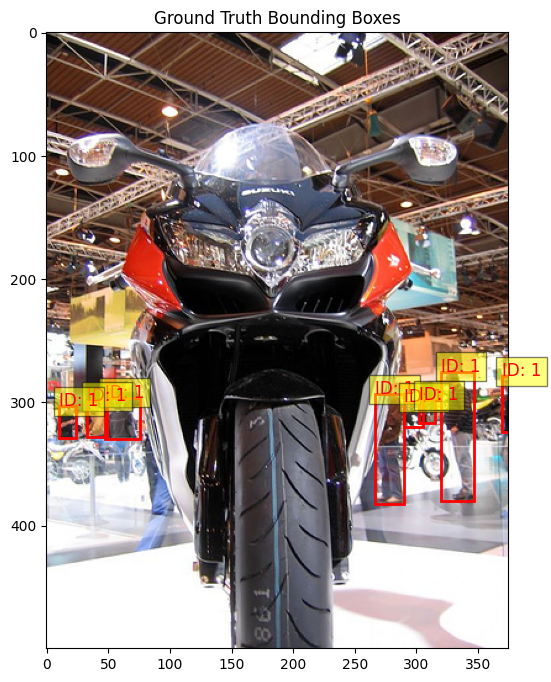

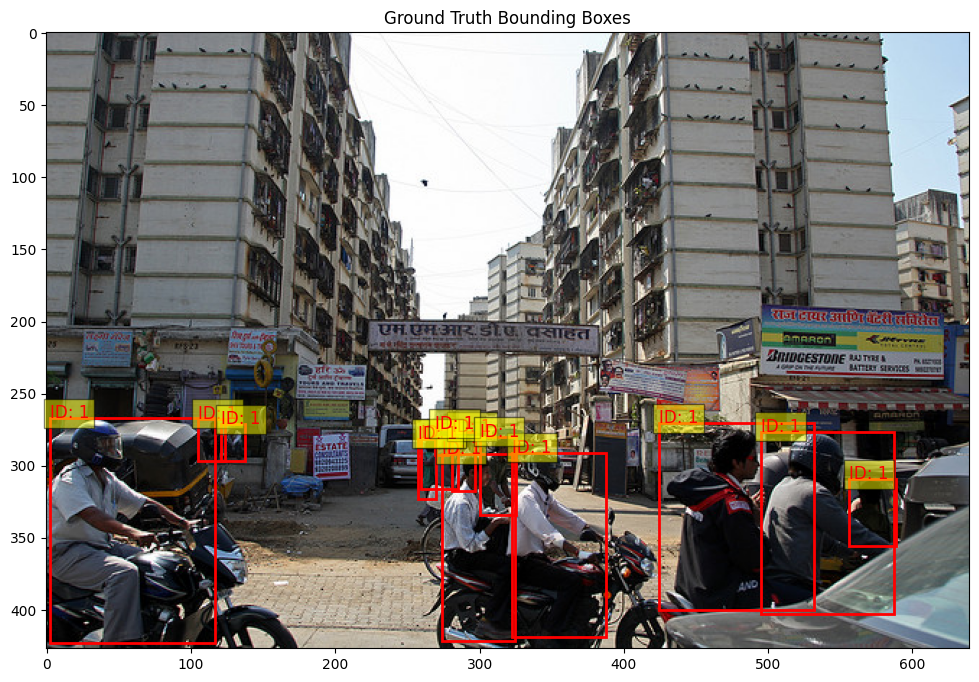

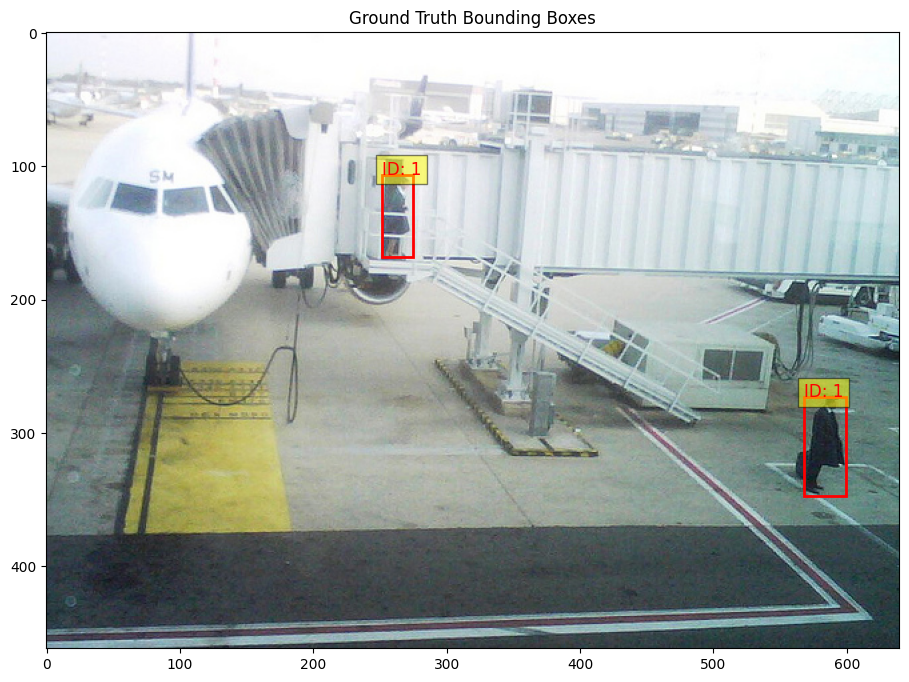

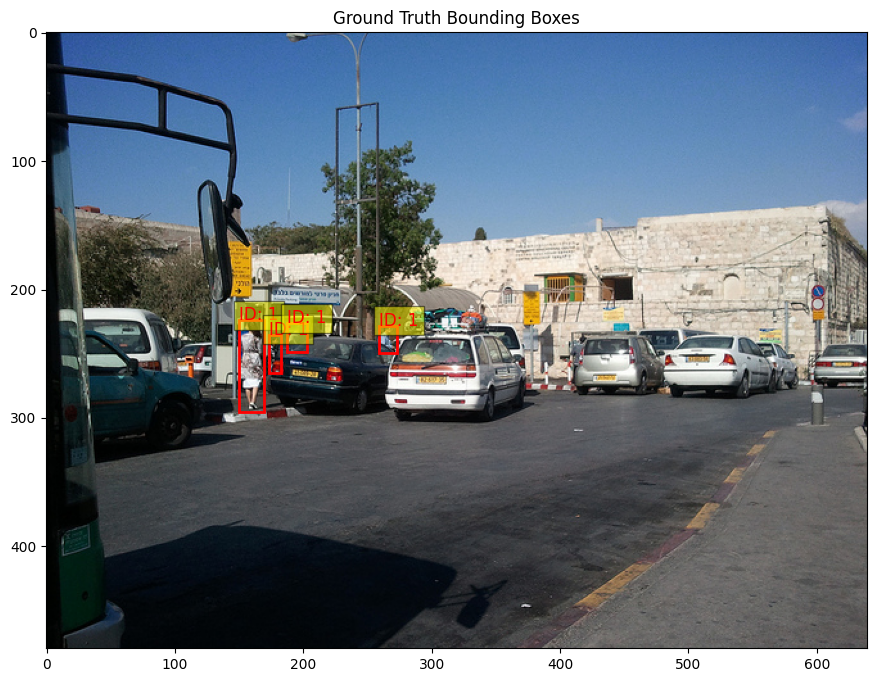

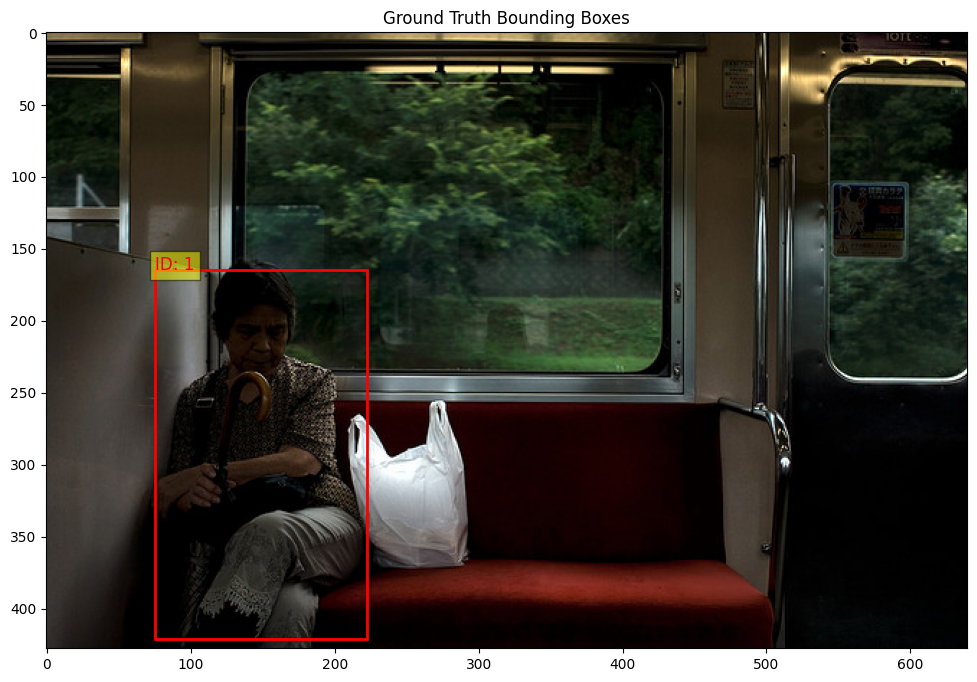

In [17]:
from pycocotools.coco import COCO
dataset = CustomCocoDataset(root=root, annotation_file=ann_path)

# Ambil 5 gambar pertama dan tampilkan dengan bounding box-nya
for i in range(5):
    image, target = dataset[i]  # Ambil gambar dan target
    if image is not None:
        visualize_annotations(image, target)


## Pembuatan Model

In [18]:
# Set the device to GPU if available
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

transform = T.Compose([
    T.RandomHorizontalFlip(),
    T.RandomRotation(30),
    T.ToTensor(),
    T.Resize([800, 800]),
])

train_images_path = train_images_dir
train_annotations_path = train_annotations_path

train_dataset = CustomCocoDataset(root=root, annotation_file=ann_path, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))



loading annotations into memory...
Done (t=0.04s)
creating index...
index created!


In [19]:
model_frcnn = fasterrcnn_resnet50_fpn(pretrained=True).to(device)
model_frcnn.eval()

in_features = model_frcnn.roi_heads.box_predictor.cls_score.in_features
model_frcnn.roi_heads.box_predictor = torchvision.models.detection.faster_rcnn.FastRCNNPredictor(in_features, num_classes=2)  # 2 classes: background and person

# Move model to GPU
model_frcnn.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 148MB/s]


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

## Training Model

In [28]:
def train_model(model, dataloader, optimizer, scheduler, device, num_epochs=10, save_path="fasterrcnn_person"):
    model.train()  # Set model to training mode

    for epoch in range(num_epochs):
        running_loss = 0.0

        for batch_idx, (images, targets) in enumerate(dataloader):
            # Move images and targets to the device
            images = [image.to(device) for image in images]
            targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

            # Skip empty batches
            if not images or not targets:
                continue

            # Forward pass
            loss_dict = model(images, targets)
            total_loss = sum(loss for loss in loss_dict.values())

            # Backpropagation and optimizer step
            optimizer.zero_grad()
            total_loss.backward()
            optimizer.step()

            # Accumulate loss
            running_loss += total_loss.item()

        # Print epoch-level progress
        epoch_loss = running_loss / len(dataloader)
        print(f"Epoch {epoch + 1}/{num_epochs}, Average Loss: {epoch_loss:.4f}")

        # Step the scheduler
        if scheduler:
            scheduler.step()

        # Save the model after each epoch
        torch.save(model.state_dict(), f"{save_path}_epoch_{epoch + 1}.pth")

    print("Training complete!")


# Setup optimizer, scheduler, and train the model
if __name__ == "__main__":
    print("Training Faster R-CNN for 'Person' class only...")

    # Define optimizer
    optimizer = torch.optim.SGD(model_frcnn.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)

    # Define learning rate scheduler
    lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

    # Train the model
    train_model(
        model=model_frcnn,
        dataloader=train_loader,
        optimizer=optimizer,
        scheduler=lr_scheduler,
        device=device,
        num_epochs=20,
        save_path="faster r-cnn"
    )


Training Faster R-CNN for 'Person' class only...
Epoch 1/20, Average Loss: 0.5008
Epoch 2/20, Average Loss: 0.4878
Epoch 3/20, Average Loss: 0.4881
Epoch 4/20, Average Loss: 0.4810
Epoch 5/20, Average Loss: 0.4793
Epoch 6/20, Average Loss: 0.4813
Epoch 7/20, Average Loss: 0.4765
Epoch 8/20, Average Loss: 0.4744
Epoch 9/20, Average Loss: 0.4730
Epoch 10/20, Average Loss: 0.4790
Epoch 11/20, Average Loss: 0.4720
Epoch 12/20, Average Loss: 0.4775
Epoch 13/20, Average Loss: 0.4731
Epoch 14/20, Average Loss: 0.4739
Epoch 15/20, Average Loss: 0.4780
Epoch 16/20, Average Loss: 0.4789
Epoch 17/20, Average Loss: 0.4729
Epoch 18/20, Average Loss: 0.4717
Epoch 19/20, Average Loss: 0.4777
Epoch 20/20, Average Loss: 0.4741
Training complete!


# Evaluasi Model

## Testing Model

In [21]:
def collate_fn(batch):
    images, targets = zip(*batch)
    return list(images), list(targets)


In [22]:
test_dataset = CustomCocoDataset(root=test_images_dir, annotation_file=test_annotations_path, transform=transform)

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!


In [23]:
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=4,
    collate_fn=collate_fn,
    shuffle=False
)


In [24]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import torch

def visualize_predictions(image, targets, predictions):
    """
    Visualize ground truth and predicted bounding boxes.

    Parameters:
    - image: Input image tensor (C, H, W)
    - targets: Dictionary containing ground truth boxes
    - predictions: Dictionary containing predicted boxes and scores
    """
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    ax.imshow(image.permute(1, 2, 0))  # Convert image tensor to HWC format for matplotlib

    # Visualize ground truth boxes
    for box in targets['boxes']:
        x1, y1, x2, y2 = box.tolist()
        rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='green', facecolor='none', label="Ground Truth")
        ax.add_patch(rect)

    # Visualize predicted boxes
    for box, score in zip(predictions['boxes'], predictions['scores']):
        if score > 0.5:  # Confidence threshold
            x1, y1, x2, y2 = box.tolist()
            rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='red', facecolor='none', label="Prediction")
            ax.add_patch(rect)

    ax.legend(["Ground Truth", "Prediction"], loc='upper left')
    plt.show()



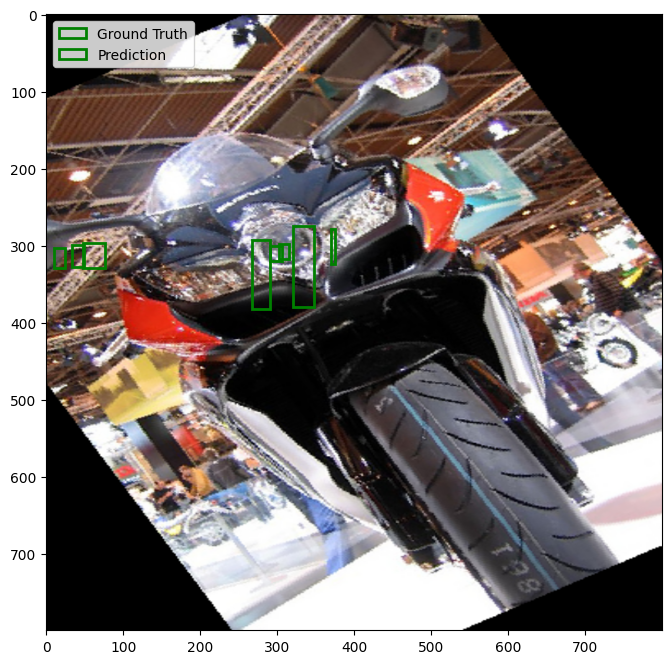

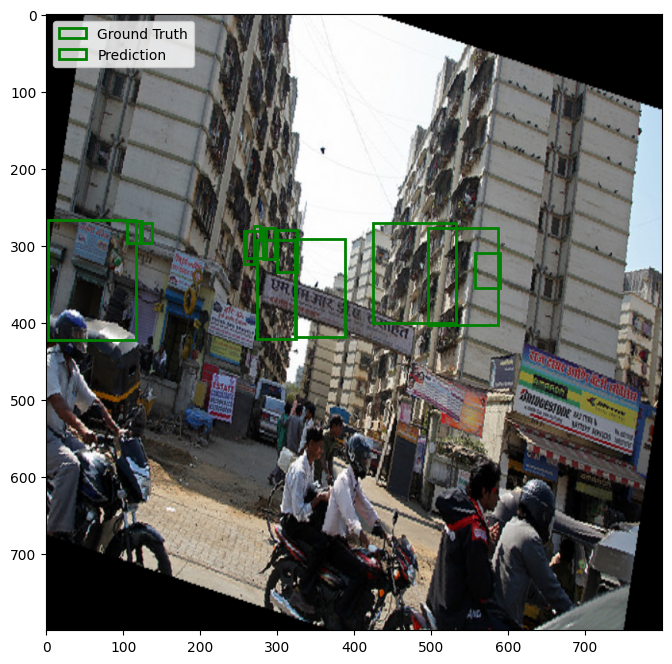

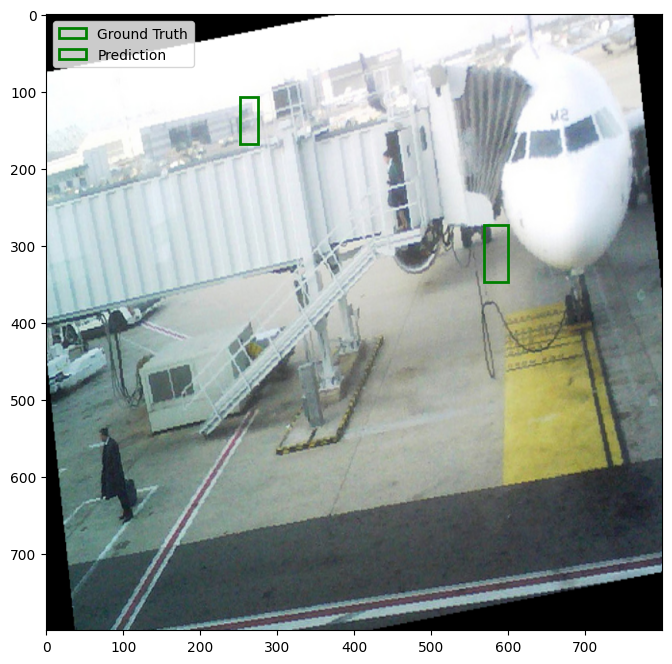

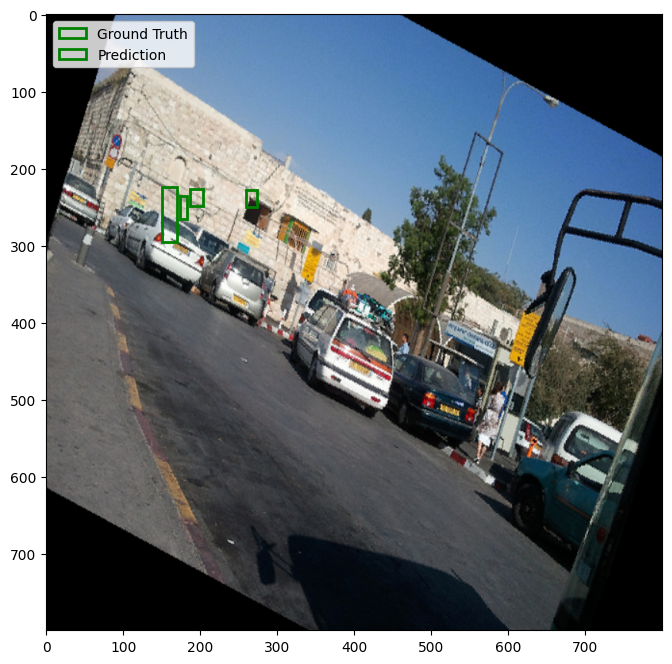

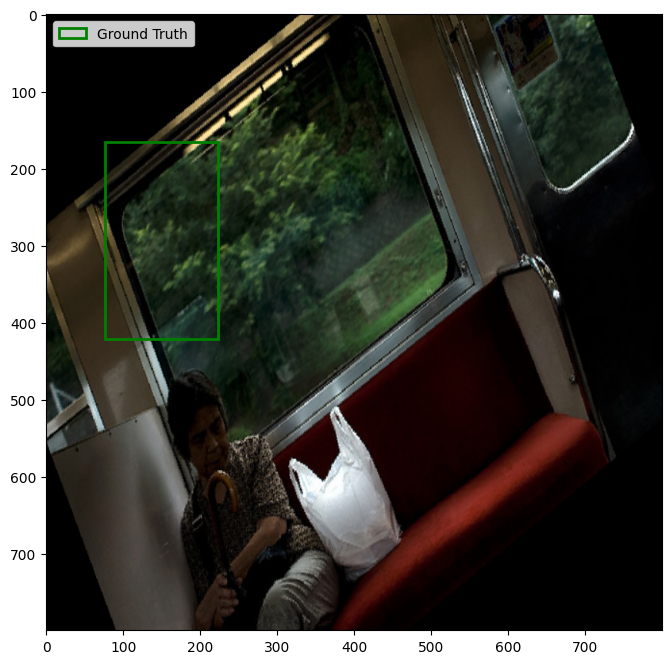

In [25]:
# Set model to evaluation mode
model_frcnn.eval()

# Counter to limit the number of images to visualize
max_images_to_display = 5
image_counter = 0

# Iterate through test loader
for images, targets in test_loader:
    images = [img.to(device) for img in images]
    targets = [{k: v.to(device) for k, v in t.items()} for t in targets]  # Move targets to device

    with torch.no_grad():
        predictions = model_frcnn(images)

    # Visualize predictions for the first 'max_images_to_display' images in the batch
    for i in range(len(images)):
        if image_counter < max_images_to_display:
            visualize_predictions(images[i].cpu(), targets[i], predictions[i])
            image_counter += 1
        else:
            break  # Stop visualizing after 5 images
    if image_counter >= max_images_to_display:
        break  # Stop after 5 images


## Evaluasi mAP

In [26]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 23.3 MB/s eta 0:00:00


In [27]:
from torchmetrics.detection.mean_ap import MeanAveragePrecision

# Inisialisasi evaluator
metric = MeanAveragePrecision(iou_thresholds=[0.5 + i * 0.05 for i in range(10)])  # AP@[.5:.95]

model_frcnn.eval()  # Set model ke evaluation mode
for images, targets in test_loader:
    images = [img.to(device) for img in images]

    with torch.no_grad():
        predictions = model_frcnn(images)

    # Format predictions dan ground truth
    formatted_preds = [
        {"boxes": pred["boxes"].cpu(), "scores": pred["scores"].cpu(), "labels": pred["labels"].cpu()}
        for pred in predictions
    ]
    formatted_targets = [
        {"boxes": target["boxes"].cpu(), "labels": target["labels"].cpu()}
        for target in targets
    ]

    # Update evaluator
    metric.update(formatted_preds, formatted_targets)

# Compute mAP results
results = metric.compute()
print("mAP@[.5:.95]:", results["map"])
print("AP at IoU=0.50:", results["map_50"])
print("AP at IoU=0.75:", results["map_75"])



mAP@[.5:.95]: tensor(0.0070)
AP at IoU=0.50: tensor(0.0337)
AP at IoU=0.75: tensor(0.0007)
